In [3]:
import pandas as pd

In [2]:
# load data

df = pd.read_csv('./transcripts2.csv', index_col=[0])

df.head()

,human,machine,storyno
0,3132 Page 1 Onc...,Page. I 3132 Once there was a little cheatah a...,3132
1,The pony that didn't know. Once there was a p...,- 3106 The pony that didn't know. Once there w...,3104
2,Rainbow the Unica Once there was a unicorn nam...,3103 Rainkai the Unica Once there was a unicon...,3103
3,3117 gumdrop land 1 gumdrop land is ...,3117 gum drop Tood (1 - qum drop land is a pla...,3117
4,The secret fifth grade I am Amelia I am starti...,3102 The secret fifth grade I am Ameilia I am ...,3102


In [3]:
df.tail()

,human,machine,storyno
162,"5132 One day, in the middle of August, ther...","5132 - - One day, in the middle of August, the...",5132
163,"5103 => ""Hey[]"" exclaimed Tommy, ""thats my ...","5103 Indent Heytm exclaimed Tommy,"" thats my p...",5103
164,5104 One day a kid named Steven was at school...,-5104 One day a kid named Steven was at school...,5104
165,5105 []The wind was howeling against my windo...,"-510s window. The rolling her eyes, The wind w...",5105
166,5102 There I was flying over a cliff. My nam...,cliffe and Į am 5102 There I was flying over e...,5102


## Error metric

In [3]:
# !pip install pylcs  # for Colab
import pylcs

     |████████████████████████████████| 153kB 4.8MB/s 
  ERROR: Failed building wheel for pylcs
  Running setup.py clean for pylcs
Failed to build pylcs
    Running setup.py install for pylcs ... done


In [ ]:
def calc_error(t1, t2):
    """Takes in two different transcriptions of a story, returns the diff score"""

    # cut out the spaces in both -- the human transcripts use spaces visually
    # this may also eliminate real space errors but I think it's better
    t1 = t1.replace(" ", "")
    t2 = t2.replace(" ", "")

    # transcripts may differ in exact length
    avg_length = (len(t1) + len(t2)) / 2

    # result: average number of single-character errors per character
    return pylcs.levenshtein_distance(t1, t2) / avg_length

In [41]:
df['error'] = 0.0

,human,machine,storyno,error
0,3132 Page 1 Onc...,Page. I 3132 Once there was a little cheatah a...,3132,0.0
1,The pony that didn't know. Once there was a p...,- 3106 The pony that didn't know. Once there w...,3104,0.0
2,Rainbow the Unica Once there was a unicorn nam...,3103 Rainkai the Unica Once there was a unicon...,3103,0.0
3,3117 gumdrop land 1 gumdrop land is ...,3117 gum drop Tood (1 - qum drop land is a pla...,3117,0.0
4,The secret fifth grade I am Amelia I am starti...,3102 The secret fifth grade I am Ameilia I am ...,3102,0.0


In [66]:
for i in range(df.shape[0]):
    df.loc[i, 'error'] = calc_error(df.loc[i, 'human'], df.loc[i, 'machine'])

df.head(10)

,human,machine,storyno,error
0,3132 Page 1 Onc...,Page. I 3132 Once there was a little cheatah a...,3132,0.054201
1,The pony that didn't know. Once there was a p...,- 3106 The pony that didn't know. Once there w...,3104,0.385224
2,Rainbow the Unica Once there was a unicorn nam...,3103 Rainkai the Unica Once there was a unicon...,3103,0.158262
3,3117 gumdrop land 1 gumdrop land is ...,3117 gum drop Tood (1 - qum drop land is a pla...,3117,0.156410
4,The secret fifth grade I am Amelia I am starti...,3102 The secret fifth grade I am Ameilia I am ...,3102,0.053980
5,"My alarm clock went off. I got out of bed, pu...",3105 My alarm clock went off. I got out of bed...,3105,0.334749
6,"3129 ""found it"" said Katrina, a villan who ro...","3129 found it"" said Katrina, a villan who roam...",3129,0.062708
7,3116 1 So once there was a turtle name C...,3116 So once there was a turtle named Cacti. H...,3116,0.063376
8,Lia Hi my name is Lia Clark. My twin sister's ...,"3111 a Hi my name is lia Clark, My twin sister...",3111,0.035714
9,"3118 1 ""...",- 3118 This is my jungle. I had it first and y...,3118,0.023464


In [67]:
df['error'].describe()

count    167.000000
mean       0.146123
std        0.172315
min        0.016505
25%        0.057773
50%        0.098283
75%        0.155547
max        1.429189
Name: error, dtype: float64

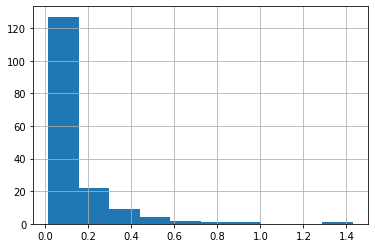

In [85]:
df['error'].hist()

In [83]:
df2 = df.copy()

df2.sort_values('error').tail(10)

,human,machine,storyno,error
141,5122 Bobby and Dug are best frie...,5122 - Remember the story of The Tortoise And ...,5122,0.413299
55,-3215 The Valcano eruption The ground ...,- 3215 The Valcano eruption og 1 The ground wa...,3215,0.491499
86,Attack of the Drones Part II ...,Attack of the Drones Port II - 5264 A Planet W...,5264,0.512182
164,5104 One day a kid named Steven was at school...,-5104 One day a kid named Steven was at school...,5104,0.532726
80,The Avocado Dillema [] The two pandas P...,5262 - The Avocado Dillena The two ponedas Per...,5262,0.553708
27,3124 Page 1 It was a quie...,3124 Page ] It was a quiet night in the librar...,3124,0.634308
64,"-3213 ""Phew"" said Jack. ""That was narley"". J...","- 3213 Phew said Jack, "" That was narley Jack ...",3213,0.712313
145,"5109 ""Loser!"" Someone called after me. I sig...","5109 Looking closer, I realized that the older...",5109,0.779459
69,-3236 Once there was an alien that came down ...,- 3236 Once there was an alien that came down ...,3236,0.888889
66,-3240 Once their was a young girl named Ellie...,- 3240 wolf named Sofe Hudding said Why where ...,3240,1.429189


Individual investigation of the causes of the ten highest error scores:

- human error (missing images in Graig's data): stories 3240, 5109, and 5262
- the other kind of human error (transcript is missing content, but the images aren't): stories 3213 and 3215
- story contains crossed-out portion (that Google tried to render and the human transcriber didn't): story 5122
- exceptionally bad handwriting: stories 3236, 3124, and 5264
- ??: story 5104

## Quotation loss?

In [4]:
# pylcs can have installation troubles
# I used it in Colab and exported the output error score df

# df = pd.read_csv('errortranscripts.csv', index_col=[0])

df.head()

,human,machine,storyno,error
0,3132 Page 1 Onc...,Page. I 3132 Once there was a little cheatah a...,3132,0.054201
1,The pony that didn't know. Once there was a p...,- 3106 The pony that didn't know. Once there w...,3104,0.385224
2,Rainbow the Unica Once there was a unicorn nam...,3103 Rainkai the Unica Once there was a unicon...,3103,0.158262
3,3117 gumdrop land 1 gumdrop land is ...,3117 gum drop Tood (1 - qum drop land is a pla...,3117,0.156410
4,The secret fifth grade I am Amelia I am starti...,3102 The secret fifth grade I am Ameilia I am ...,3102,0.053980


In [5]:
# how many quotation marks in particular are lost to computer vision?

def count_quotes(string):
    return string.count('"')

In [6]:
df['human_q'] = df['human'].apply(count_quotes)
df['machine_q'] = df['machine'].apply(count_quotes)

df.head()

,human,machine,storyno,error,human_q,machine_q
0,3132 Page 1 Onc...,Page. I 3132 Once there was a little cheatah a...,3132,0.054201,14,6
1,The pony that didn't know. Once there was a p...,- 3106 The pony that didn't know. Once there w...,3104,0.385224,6,0
2,Rainbow the Unica Once there was a unicorn nam...,3103 Rainkai the Unica Once there was a unicon...,3103,0.158262,2,1
3,3117 gumdrop land 1 gumdrop land is ...,3117 gum drop Tood (1 - qum drop land is a pla...,3117,0.156410,0,0
4,The secret fifth grade I am Amelia I am starti...,3102 The secret fifth grade I am Ameilia I am ...,3102,0.053980,0,0


In [8]:
df['human_q'].describe()

count    167.000000
mean      16.245509
std       14.779694
min        0.000000
25%        6.000000
50%       12.000000
75%       20.000000
max       84.000000
Name: human_q, dtype: float64

In [9]:
df['machine_q'].describe()

count    167.000000
mean       8.718563
std        9.843894
min        0.000000
25%        2.000000
50%        6.000000
75%       12.000000
max       53.000000
Name: machine_q, dtype: float64

In [10]:
df[['human_q', 'machine_q']].corr()

,human_q,machine_q
human_q,1.000000,0.858568
machine_q,0.858568,1.000000


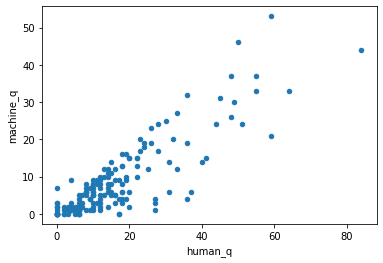

In [12]:
df.plot.scatter('human_q', 'machine_q');

In [14]:
df[df['human_q'] < df['machine_q']]

,human,machine,storyno,error,human_q,machine_q
47,-3235 I was walking home from school It was a...,-3235 I was walking home from school It was Ia...,3235,0.163232,0,2
53,- 3234 Arania stepped outside and made sure...,- 3234 Arania stepped outside and made sure no...,3234,0.130264,0,1
55,-3215 The Valcano eruption The ground ...,- 3215 The Valcano eruption og 1 The ground wa...,3215,0.491499,4,9
59,-3241 Once there was a girl named Sylvie. He...,- 3241 Once there was a girl named Sylvie. her...,3241,0.046269,0,2
70,- 3238 Once upon a time the was two kids AKA...,- 3238 Once upon a time the was two kids AKA t...,3238,0.059590,0,3
72,- 323a Once there was a little girl named R...,- 323a (C Once there was a little girl named R...,3239,0.080295,0,7
76,- 3237 Once apon a time there were humans wi...,3237 Once apon a time there were humans with a...,3237,0.066986,0,3


## Text stats

In [ ]:
# story length in characters

df['len_h'] = df['human'].apply(lambda s: len(s))
df['len_m'] = df['machine'].apply(lambda s: len(s))

In [8]:
# !pip install textstat  # for colab

import textstat

In [ ]:
# Flesch Reading Ease: uses words per sentence and syllables per word

df['fre_h'] = df['human'].apply(textstat.flesch_reading_ease)
df['fre_m'] = df['machine'].apply(textstat.flesch_reading_ease)

# SMOG grade: polysyllables (issues when applied to short texts)

df['smog_h'] = df['human'].apply(textstat.smog_index)
df['smog_m'] = df['machine'].apply(textstat.smog_index)

# Flesch_Kincaid Grade Level: words per sentence and syllables per word

df['fkg_h'] = df['human'].apply(textstat.flesch_kincaid_grade)
df['fkg_m'] = df['machine'].apply(textstat.flesch_kincaid_grade)

# Coleman-Liau Index: characters and sentences per word

df['cli_h'] = df['human'].apply(textstat.coleman_liau_index)
df['cli_m'] = df['machine'].apply(textstat.coleman_liau_index)

# Automated Readability Index: characters per word and words per sentence

df['ari_h'] = df['human'].apply(textstat.automated_readability_index)
df['ari_m'] = df['machine'].apply(textstat.automated_readability_index)

# Dale-Chall Readability Score: "difficult" word density and words per sentence

df['dcr_h'] = df['human'].apply(textstat.dale_chall_readability_score)
df['dcr_m'] = df['machine'].apply(textstat.dale_chall_readability_score)

# Difficult Words: raw count of DC "difficult" words

df['dw_h'] = df['human'].apply(textstat.difficult_words)
df['dw_m'] = df['machine'].apply(textstat.difficult_words)

# Linsear Write Formula: counts of "easy" and "difficult" words and sentences per word

df['lwf_h'] = df['human'].apply(textstat.linsear_write_formula)
df['lwf_m'] = df['machine'].apply(textstat.linsear_write_formula)

# Gunning fog: sentence length and percentage of complex words

df['gf_h'] = df['human'].apply(textstat.gunning_fog)
df['gf_m'] = df['machine'].apply(textstat.gunning_fog)

# Consolidated Score: Textstat's amalgamation of the preceding scores
# mirrors the function in the .py file, which is currently set not to output a number

df['cs_h'] = df['human'].apply(textstat.text_standard)
df['cs_m'] = df['machine'].apply(textstat.text_standard)

In [ ]:
# csv distributed privately

df.to_csv("metrics.csv")